# Single Layer Neural Network

In [1]:
#!pip3 install tensorflow keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import time
import statistics
import pickle

In [3]:
test = pd.read_csv("../data/processed/test.csv").drop(columns = ['Unnamed: 0'])
train = pd.read_csv("../data/processed/train.csv").drop(columns = ['Unnamed: 0'])

In [4]:
features = train.shape[1] -1

## Create Models

In [5]:
def create_model(features,layers,activation):
    model = Sequential()
    model.add(Dense(features, input_dim=features, activation=activation))
    for i in range(layers):
        model.add(Dense(features, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])
    return model

In [6]:
model1_tanh = create_model(features,1,'tanh')
model1_relu = create_model(features,1,'relu')
model1_swish = create_model(features,1,'swish')
model3_tanh = create_model(features,3,'tanh')
model3_relu = create_model(features,3,'relu')
model3_swish = create_model(features,3,'swish')
model5_tanh = create_model(features,5,'tanh')
model5_relu = create_model(features,5,'relu')
model5_swish = create_model(features,5,'swish')
model10_tanh = create_model(features,10,'tanh')
model10_relu = create_model(features,10,'relu')
model10_swish = create_model(features,10,'swish')

2022-03-07 20:11:06.257076: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-07 20:11:06.257123: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-07 20:11:06.257152: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c-VirtualBox): /proc/driver/nvidia/version does not exist
2022-03-07 20:11:06.257511: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train models

In [7]:
def train_model(train,test,model):
    train_X = train.drop('normal',axis=1)
    test_X = train.drop('normal',axis=1)
    train_Y = train['normal']
    test_Y = train['normal']
    old_score = 0
    test_score_acc=[]
    train_score_acc=[]
    test_score_auc=[]
    train_score_auc=[]
    model_time = []
    epoch = 0
    while (epoch < 2) or (test_score_auc[epoch-1] > test_score_auc[epoch-2]):
        model_time1 = time.perf_counter()
        model.fit(train_X,train_Y,epochs=1,batch_size=128)
        current_train_score = model.evaluate(train_X,train_Y)
        model_time2 = time.perf_counter()
        model_time.append(model_time2 - model_time1)
        train_score_acc.append(current_train_score[1])
        train_score_auc.append(current_train_score[2])
        current_test_score = model.evaluate(test_X,test_Y)
        test_score_acc.append(current_test_score[1])
        test_score_auc.append(current_test_score[2])
        epoch = epoch + 1
    avg_time = statistics.mean(model_time)
    return (test_score_acc[:-1], train_score_acc[:-1], test_score_auc[:-1], train_score_auc[:-1], avg_time)

In [8]:
(test_acc, train_acc, test_auc, train_auc, time) = train_model(train,test,model1_relu)

11579/11579 [==============================] - 22s 2ms/step - loss: 0.0045 - accuracy: 0.9989 - auc: 0.9998


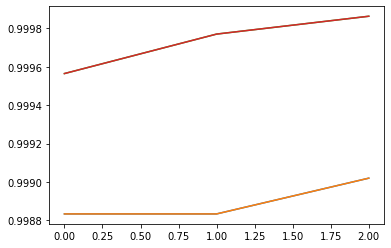

In [5]:
with open('../data/processed/scores','rb') as f:
    scores = pickle.load(f)
len(scores)

12